<a href="https://colab.research.google.com/github/navin123456789/Kalimati_Tarkari-Webscrape-and-EDA/blob/main/kalimati_tarkari_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
## request to url that we want to scrape

## There is list of vegetables with respect to their min,max and avg price per kg of a particular day ie March 09

source=requests.get('https://nepalicalendar.rat32.com/vegetable')
source.raise_for_status() ## This is for the error throw for incorrect url

In [ ]:
soup=BeautifulSoup(source.text,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="../images/favicon.ico" rel="shortcut icon"/>
<title>Vegetable Rates Today, Vegetable Rate in Nepal, Kalimati Vegetable</title>
<meta content="Vegetable Rates Today, Vegetable Rate in Nepal, Kalimati Vegetable." name="description"/>
<meta content="Vegetable Rates Today, Vegetable Rate in Nepal, Kalimati Vegetable." name="keywords"/>
<meta content="Vegetable Rates Today, Vegetable Rate in Nepal, Kalimati Vegetable" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://nepalicalendar.rat32.com/vegetable/" property="og:url"/>
<meta content="https://nepalicalendar.rat32.com/vegetable/vegetable-rate.png" property="og:image"/>
<meta content="vegetable rate nepal today" property="og:description"/>
<meta content="130883933736918" property="fb:app_id"/>
<meta 

In [ ]:
table_body=soup.find('table')
print(table_body)

<table id="commodityDailyPrice" style="width:100%">
<thead>
<tr>
<th onclick="sortTable(0)">Commodity ⇅</th>
<th onclick="sortTable(1)">Unit ⇅</th>
<th onclick="sortNum(2,'')">Minimum ⇅</th>
<th onclick="sortNum(3,'')">Maximum ⇅</th>
<th onclick="sortNum(4,'')">Average ⇅</th>
</tr>
</thead>
<tbody>
<tr><td>Tomato Big(Nepali)</td><td>Kg</td><td>50</td><td>60</td><td>57</td></tr><tr><td>Tomato Big(Indian)</td><td>Kg</td><td>50</td><td>60</td><td>57</td></tr><tr><td>Tomato Small(Local)</td><td>Kg</td><td>40</td><td>50</td><td>45</td></tr><tr><td>Tomato Small(Tunnel)</td><td>Kg</td><td>60</td><td>70</td><td>65</td></tr><tr><td>Tomato Small(Indian)</td><td>Kg</td><td>50</td><td>60</td><td>55</td></tr><tr><td>Tomato Small(Terai)</td><td>Kg</td><td>50</td><td>60</td><td>55</td></tr><tr><td>Potato Red</td><td>Kg</td><td>25</td><td>26</td><td>26</td></tr><tr><td>Potato Red(Indian)</td><td>Kg</td><td>20</td><td>22</td><td>21</td></tr><tr><td>Potato White</td><td>Kg</td><td>17</td><td>18</td><td>

In [ ]:
 #stores row info

row_data=[]

for row in table_body.find_all('tr'):
  col=row.find_all('td')
  col=[ele.text.strip() for ele in col]
  row_data.append(col)
print(row_data)








[[], ['Tomato Big(Nepali)', 'Kg', '50', '60', '57'], ['Tomato Big(Indian)', 'Kg', '50', '60', '57'], ['Tomato Small(Local)', 'Kg', '40', '50', '45'], ['Tomato Small(Tunnel)', 'Kg', '60', '70', '65'], ['Tomato Small(Indian)', 'Kg', '50', '60', '55'], ['Tomato Small(Terai)', 'Kg', '50', '60', '55'], ['Potato Red', 'Kg', '25', '26', '26'], ['Potato Red(Indian)', 'Kg', '20', '22', '21'], ['Potato White', 'Kg', '17', '18', '18'], ['Onion Dry (Indian)', 'Kg', '35', '36', '36'], ['Carrot(Local)', 'Kg', '25', '30', '28'], ['Carrot(Terai)', 'Kg', '20', '25', '23'], ['Cabbage(Local)', 'Kg', '12', '18', '15'], ['Cabbage(Terai)', 'Kg', '12', '18', '15'], ['Cabbage', 'Kg', '14', '18', '16'], ['Cauli Local', 'Kg', '50', '60', '55'], ['Cauli Local(Jyapu)', 'Kg', '60', '70', '65'], ['Raddish Red', 'Kg', '70', '80', '77'], ['Raddish White(Local)', 'Kg', '35', '40', '38'], ['Raddish White(Hybrid)', 'Kg', '40', '45', '43'], ['Brinjal Long', 'Kg', '50', '60', '57'], ['Brinjal Round', 'Kg', '50', '60', '57

In [ ]:
## display firt 5 data ie rows

df=pd.DataFrame(row_data)
df.head(5)

,0,1,2,3,4
0,None,None,None,None,None
1,Tomato Big(Nepali),Kg,50,60,57
2,Tomato Big(Indian),Kg,50,60,57
3,Tomato Small(Local),Kg,40,50,45
4,Tomato Small(Tunnel),Kg,60,70,65


In [ ]:
# Save scraped data to csv

df.to_csv('kalimati_vegetable_excelsheet.csv')



In [ ]:
newdf=pd.read_csv('kalimati_vegetable_excelsheet.csv')
newdf.head()

,Unnamed: 0,0,1,2,3,4
0,0,NaN,NaN,NaN,NaN,NaN
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0
3,3,Tomato Small(Local),Kg,40.0,50.0,45.0
4,4,Tomato Small(Tunnel),Kg,60.0,70.0,65.0


In [ ]:
## drop the first row as it contains nan value and also column 1 as it contain all unit in kg

newdf=newdf.dropna()
newdf.head()



,Unnamed: 0,0,1,2,3,4
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0
3,3,Tomato Small(Local),Kg,40.0,50.0,45.0
4,4,Tomato Small(Tunnel),Kg,60.0,70.0,65.0
5,5,Tomato Small(Indian),Kg,50.0,60.0,55.0


In [ ]:
## rename the columns

newdf.rename(columns={'0':'Commodity'},inplace=True)
newdf.rename(columns={'1':'Unit'},inplace=True)
newdf.rename(columns={'2':'MIN'},inplace=True)
newdf.rename(columns={'3':'MAX'},inplace=True)
newdf.rename(columns={'4':'AVG'},inplace=True)
newdf.rename(columns={'Unnamed: 0':'S.No'},inplace=True)



In [ ]:
newdf.head()

,S.No,Commodity,Unit,MIN,MAX,AVG
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0
3,3,Tomato Small(Local),Kg,40.0,50.0,45.0
4,4,Tomato Small(Tunnel),Kg,60.0,70.0,65.0
5,5,Tomato Small(Indian),Kg,50.0,60.0,55.0


In [ ]:
## count if there null value is present

newdf.isnull().sum()


S.No         0
Commodity    0
Unit         0
MIN          0
MAX          0
AVG          0
dtype: int64

In [ ]:
## this describe all the necessary statical/mathmatical operations ie mean,std,sum etc

newdf.describe()


,S.No,MIN,MAX,AVG
count,108.000000,108.000000,108.000000,108.000000
mean,54.685185,116.064815,135.333333,126.462963
std,31.584821,98.505209,116.310895,107.088087
min,1.000000,12.000000,18.000000,15.000000
25%,27.750000,50.000000,60.000000,55.750000
50%,54.500000,80.000000,90.000000,87.000000
75%,81.250000,150.000000,180.000000,164.250000
max,109.000000,500.000000,600.000000,550.000000


In [ ]:
##find the list of Indian imported vegetables

df_indian = newdf[newdf['Commodity'].str.contains('Indian')]
df_indian

,S.No,Commodity,Unit,MIN,MAX,AVG
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0
5,5,Tomato Small(Indian),Kg,50.0,60.0,55.0
8,8,Potato Red(Indian),Kg,20.0,22.0,21.0
10,10,Onion Dry (Indian),Kg,35.0,36.0,36.0
77,77,Orange(Indian),Kg,120.0,150.0,135.0
87,87,Papaya(Indian),Kg,90.0,100.0,97.0


In [ ]:
df_tomato_compare = newdf[newdf['Commodity'].str.contains('Tomato Big')]
df_tomato_compare

,S.No,Commodity,Unit,MIN,MAX,AVG
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0


In [ ]:
df_tomato_compare = newdf[newdf['Commodity'].str.contains('Tomato Big')]
df_tomato_compare

,S.No,Commodity,Unit,MIN,MAX,AVG
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0


In [ ]:
df_orange_compare = newdf[newdf['Commodity'].str.contains('Orange')]
df_orange_compare

,S.No,Commodity,Unit,MIN,MAX,AVG
77,77,Orange(Indian),Kg,120.0,150.0,135.0
79,79,Sweet Orange,Kg,150.0,180.0,165.0


In [ ]:
df_papaya_compare = newdf[newdf['Commodity'].str.contains('Papaya')]
df_papaya_compare

,S.No,Commodity,Unit,MIN,MAX,AVG
86,86,Papaya(Nepali),Kg,70.0,80.0,77.0
87,87,Papaya(Indian),Kg,90.0,100.0,97.0


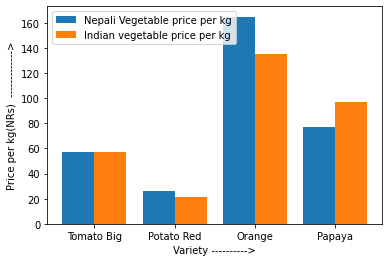

In [ ]:
Vegetable=['Tomato Big','Potato Red','Orange','Papaya']
Price_Nepali=[57,26,165,77]
Price_Indian=[57,21,135,97]

xpos=np.arange(len(Vegetable))
xpos

plt.bar(xpos-0.2,Price_Nepali,width=0.4,label="Nepali Vegetable price per kg")
plt.bar(xpos+0.2,Price_Indian,width=0.4,label="Indian vegetable price per kg")
plt.xticks(xpos,Vegetable)
plt.legend(loc='upper left')
plt.xlabel('Variety ---------->')
plt.ylabel('Price per kg(NRs)  ------------->')
plt.show()

The Indian Vegetables are a bit cheaper than that of Nepali

In [ ]:
## find the only tomatoes from the list of data

df_tomato = newdf[newdf['Commodity'].str.contains('Tomato')]
df_tomato


,S.No,Commodity,Unit,MIN,MAX,AVG
1,1,Tomato Big(Nepali),Kg,50.0,60.0,57.0
2,2,Tomato Big(Indian),Kg,50.0,60.0,57.0
3,3,Tomato Small(Local),Kg,40.0,50.0,45.0
4,4,Tomato Small(Tunnel),Kg,60.0,70.0,65.0
5,5,Tomato Small(Indian),Kg,50.0,60.0,55.0
6,6,Tomato Small(Terai),Kg,50.0,60.0,55.0


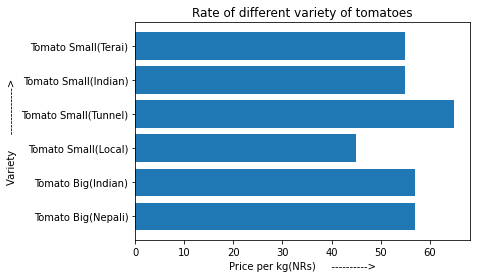

In [ ]:
plt.barh(df_tomato['Commodity'], df_tomato['AVG'])
plt.xlabel('Price per kg(NRs)     ---------->')
plt.ylabel('Variety     ------------->')
plt.title('Rate of different variety of tomatoes')
plt.show()

We find that the rate of tunnel tomato is higher than other variety of tomatoes.
Local tomatoes is much more cheaper than other varirety of tomatoes.

In [ ]:
## find potatoes from list of data

df_potato = newdf[newdf['Commodity'].str.contains('Potato')]
df_potato


,S.No,Commodity,Unit,MIN,MAX,AVG
7,7,Potato Red,Kg,25.0,26.0,26.0
8,8,Potato Red(Indian),Kg,20.0,22.0,21.0
9,9,Potato White,Kg,17.0,18.0,18.0
38,38,Sweet Potato,Kg,70.0,80.0,75.0


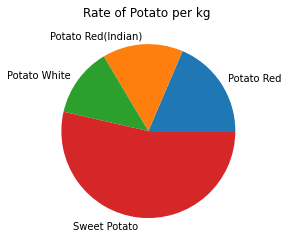

In [ ]:
fig, ax = plt.subplots()
ax.pie(df_potato['AVG'], labels=df_potato['Commodity'])
ax.set_title('Rate of Potato per kg ')
plt.show()

Nepali white potatoes are cheaper at the day of 09 March.



In [ ]:
avg=newdf['AVG'].mean()
min=newdf['MIN'].mean()
max=newdf['MAX'].mean()


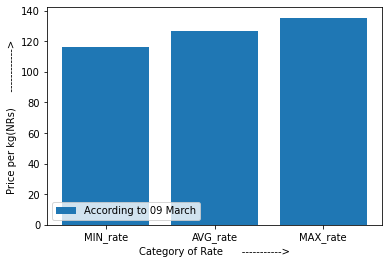

In [ ]:
label=['MIN_rate','AVG_rate','MAX_rate']
rate=[min,avg,max]
plt.bar(label,rate,label="According to 09 March")
plt.xlabel('Category of Rate      ----------->')
plt.ylabel('Price per kg(NRs)     ------------>')
plt.legend(loc='lower left')
plt.show()

In [ ]:
## Saved the data after cleaning
newdf.to_csv('kalimati_excelsheet.csv')